In [1]:
import pylab as pl
import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = {
    "lines.linewidth": 2.0,
    "axes.edgecolor": "#bcbcbc",
    "axes.facecolor": "#dddddd",
    "patch.linewidth": 1.0,
    "legend.fancybox": False,
    "font.size" : 18,
    "legend.fontsize" : "medium",
    "axes.labelsize": "large",
    "axes.grid": True,
    "grid.color": "#ffffff",
    "patch.edgecolor": "#ffffff",
    "axes.titlesize": "x-large"
}

In [3]:
pl.rcParams.update(s)

### Create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

In [4]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, error=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if error is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(error)

In [5]:
#define values
x_range = np.arange(10, 110, 10)
y_range = line(0.75, x_range, 0, error=x_range)
y_error = errors(x_range)

Text(0.5,1,'A Scatterplot of X and Y with Errorbars')

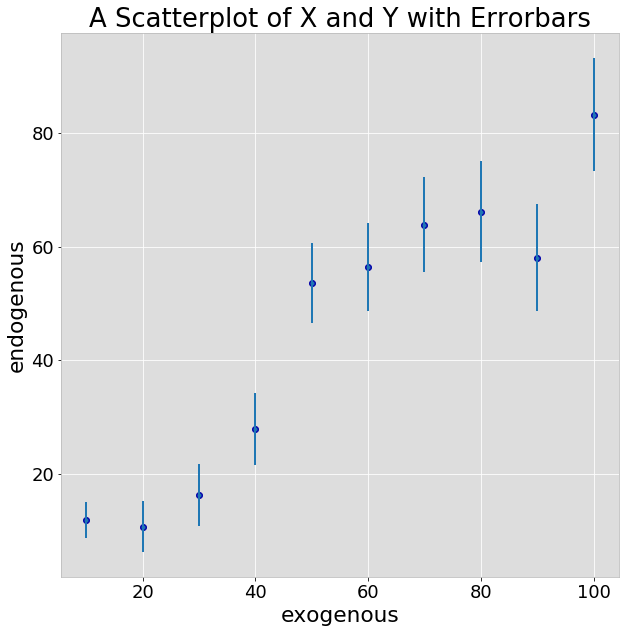

In [6]:
#generate plot
plt.figure(figsize=(10,10))

plt.scatter(x_range, y_range, color='xkcd:royal blue', marker='o')
plt.errorbar(x_range, y_range, yerr=y_error, fmt='.')

plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('A Scatterplot of X and Y with Errorbars')
    

### Print y, x, and the result of applying statsmodels.api.add_constant() to x

In [7]:
print(x_range)

[ 10  20  30  40  50  60  70  80  90 100]


In [8]:
print(y_range)

[ 11.86345227  10.67795211  16.22904204  27.89339512  53.58188348
  56.39447199  63.87016738  66.19339475  58.07811258  83.25615577]


In [9]:
print(sm.add_constant(x_range))

[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


### Use statsmodels.api.OLS to fit x and y

In [10]:
x_plus_constant = sm.add_constant(x_range)
rightfit = smf.OLS(y_range, x_plus_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     67.55
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.59e-05
Time:                        22:29:24   Log-Likelihood:                -34.980
No. Observations:                  10   AIC:                             73.96
Df Residuals:                       8   BIC:                             74.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3071      6.108      0.050      0.961       -13.777    14.391
x1             0.8090      0.098      8.219      0.000         0.582     1.036
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.378
Skew:                          -0.267   Prob(JB):                        0.828
Kurtosis:                       2.212   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
wrongfit = smf.OLS(y_range, x_range).fit()
wrongfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     358.4
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.47e-08
Time:                        22:29:24   Log-Likelihood:                -34.981
No. Observations:                  10   AIC:                             71.96
Df Residuals:                       9   BIC:                             72.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8134      0.043     18.931      0.000         0.716     0.911
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.361
Skew:                          -0.279   Prob(JB):                        0.835
Kurtosis:                       2.256   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the data (as points) and both statsmodels fits

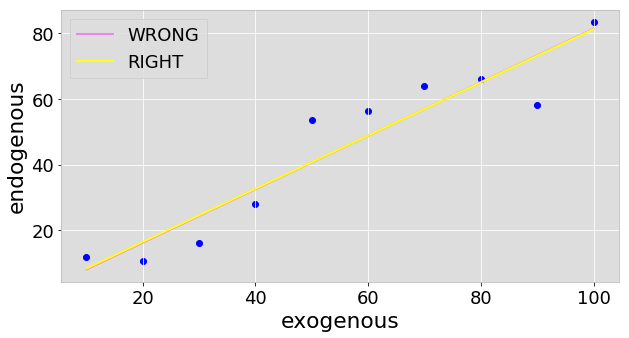

In [12]:
wrongfit_slope = wrongfit.params
rightfit_constant, rightfit_slope = rightfit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("exogenous")
plt.ylabel("endogenous")

plt.plot(x_range, wrongfit_slope * x_range, color = 'violet', label='WRONG')
plt.plot(x_range, rightfit_constant + rightfit_slope * x_range, color = 'xkcd:yellow', label='RIGHT')

plt.legend()
         
plt.show()

Figure showing two fit lines against 10 points generated using the line function.  The line labeled "right" takes into account the y intercept of the line, while the "wrong" line goes through (0,0).

### Create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [13]:
#define values
x_range = np.arange(10, 110, 10)
y_range = line(0.5, x_range, 52, error=x_range)
y_error = errors(x_range)

Text(0.5,1,'A Scatterplot of X and Y with Errorbars')

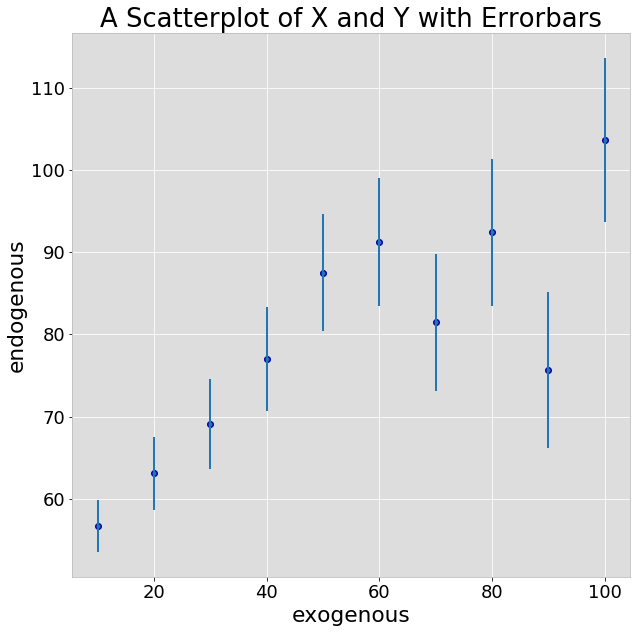

In [14]:
#generate plot
plt.figure(figsize=(10,10))

plt.scatter(x_range, y_range, color='xkcd:royal blue', marker='o')
plt.errorbar(x_range, y_range, yerr=y_error, fmt='.')

plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('A Scatterplot of X and Y with Errorbars')

In [15]:
x_plus_constant = sm.add_constant(x_range)
rightfit = smf.OLS(y_range, x_plus_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     16.33
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00373
Time:                        22:29:25   Log-Likelihood:                -34.803
No. Observations:                  10   AIC:                             73.61
Df Residuals:                       8   BIC:                             74.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         58.2822      6.001      9.713      0.000        44.445    72.120
x1             0.3909      0.097      4.042      0.004         0.168     0.614
==============================================================================
Omnibus:                        3.017   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.060
Skew:                          -0.793   Prob(JB):                        0.588
Kurtosis:                       3.170   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
wrongfit = smf.OLS(y_range, x_range).fit()
wrongfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     65.68
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.99e-05
Time:                        22:29:25   Log-Likelihood:                -47.547
No. Observations:                  10   AIC:                             97.09
Df Residuals:                       9   BIC:                             97.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2235      0.151      8.105      0.000         0.882     1.565
==============================================================================
Omnibus:                        1.229   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.890
Skew:                          -0.498   Prob(JB):                        0.641
Kurtosis:                       1.929   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

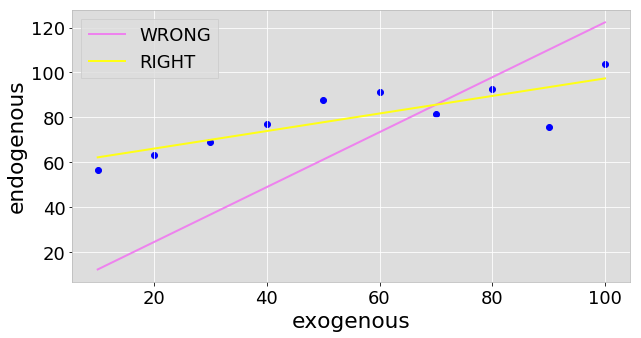

In [17]:
wrongfit_slope = wrongfit.params
rightfit_constant, rightfit_slope = rightfit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("exogenous")
plt.ylabel("endogenous")

plt.plot(x_range, wrongfit_slope * x_range, color = 'violet', label='WRONG')
plt.plot(x_range, rightfit_constant + rightfit_slope * x_range, color = 'xkcd:yellow', label='RIGHT')

plt.legend()
         
plt.show()

Figure showing that when you increase the intercept to be > 100 times the slope, the wrongness of wrong gets very obvious.

#### Now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [18]:
x_plus_constant = sm.add_constant(x_range)
rightfit = smf.WLS(y_range, x_plus_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.671
Model:                            WLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     16.33
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00373
Time:                        22:29:25   Log-Likelihood:                -34.803
No. Observations:                  10   AIC:                             73.61
Df Residuals:                       8   BIC:                             74.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         58.2822      6.001      9.713      0.000        44.445    72.120
x1             0.3909      0.097      4.042      0.004         0.168     0.614
==============================================================================
Omnibus:                        3.017   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.060
Skew:                          -0.793   Prob(JB):                        0.588
Kurtosis:                       3.170   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

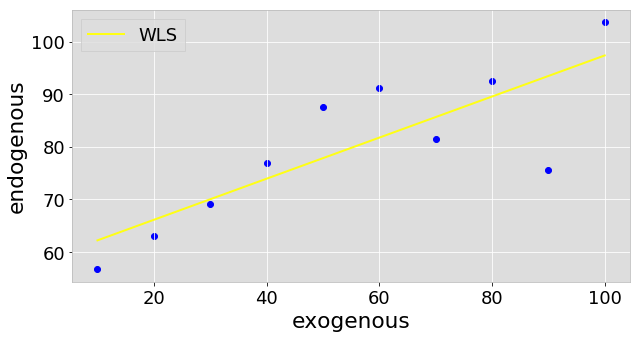

In [19]:
rightfit_constant, rightfit_slope = rightfit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("exogenous")
plt.ylabel("endogenous")

#plt.plot(x_range, wrongfit_slope * x_range, color = 'violet', label='WRONG')
plt.plot(x_range, rightfit_constant + rightfit_slope * x_range, color = 'xkcd:yellow', label='WLS')

plt.legend()
         
plt.show()

Figure showing the weighted least squares fit of a line to a series of points generated with an intercept of 52 and a slope of 0.5.